# Analysis of Dynamic Systems

## Schedule:

- Getting started
- Introduction
- Mathematical bases
- Bode diagrams
- Modeling with linear elements
- State variables
- Block diagrams
- Time response
- Frequency response
- Stability
- Root Locus
- Final project
- Course evaluation

In [1]:
# Run this only in Colab
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
colab_path = '/content/drive/My Drive/Colab Notebooks/dynamic-ud/notebooks/img/'
my_path = 'img/'
valid_path = colab_path # Use one of them depending on the platform

In [3]:
# Run this only in Colab
# Rendering SymPy equations in Colab requires the MathJax javascript library
from IPython.display import Math, HTML

def load_mathjax_in_cell_output():
  display(HTML("<script src='https://www.gstatic.com/external_hosted/"
               "mathjax/latest/MathJax.js?config=default'></script>"))
get_ipython().events.register('pre_run_cell', load_mathjax_in_cell_output)

## Modeling with linear elements of concentrated parameters

We are going to work on the course with only three systems:

- Electrical systems
- Translational mechanical systems
- Rotational mechanical systems

### Electrical elements

#### Resistance - R  [ohms]

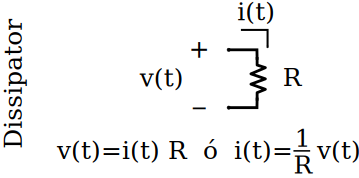

In [4]:
from IPython.display import SVG
SVG(valid_path + 'model_fig1.svg')

#### Inductance - L  [Henrios]

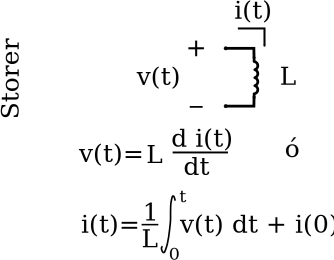

In [5]:
SVG(valid_path + 'model_fig2.svg')

#### Capacitance - C  [Farads]

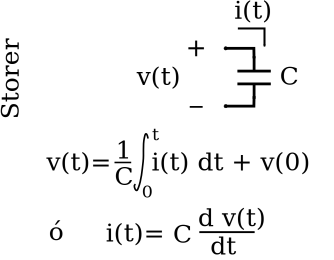

In [ ]:
SVG(valid_path + 'model_fig3.svg')

### Mechanical elements (translational)

#### Viscous damping - $\beta$  [N s/m]

In [6]:
SVG(valid_path + 'model_fig4.svg')

#### Mass - M  [kg]

In [7]:
SVG(valid_path + 'model_fig5.svg')

#### Linear spring - K  [N/m]

In [8]:
SVG(valid_path + 'model_fig6.svg')

### Mechanical elements (Rotational)

#### Viscous damping - $\beta$  [N m s/rad]

In [9]:
SVG(valid_path + 'model_fig7.svg')

#### Moment of inertia - J  [kg m$^2$]

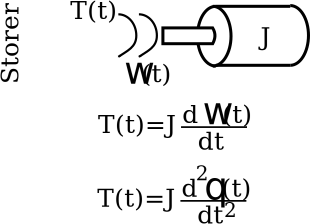

In [10]:
SVG(valid_path + 'model_fig8.svg')

#### Torsion spring - K  [N m/rad]

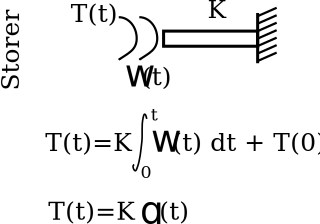

In [11]:
SVG(valid_path + 'model_fig9.svg')

## **Example**: RLC series circuit

Find the differential equation that describes the following system:

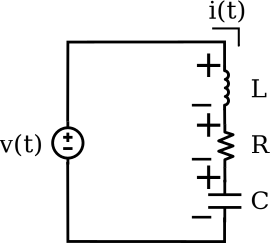

In [12]:
SVG(valid_path + 'model_fig10.svg')

**Solution**:

$$\sum V=0$$

$$L\frac{di\left(t\right)}{dt}+R\,i\left(t\right)+\frac{1}{C}\int_{0}^{t}i\left(t\right)\,dt+v_{C}\left(0\right)-v\left(t\right)=0
$$

$$v\left(t\right)=L\frac{di\left(t\right)}{dt}+R\,i\left(t\right)+\frac{1}{C}\int_{0}^{t}i\left(t\right)\,dt+v_{C}\left(0\right)
$$

Applying Laplace's transform to the equation

$$V\left(s\right)=LsI\left(s\right)-Li\left(0\right)+RI\left(s\right)+\frac{1}{Cs}I\left(s\right)+\frac{v_{C}\left(0\right)}{s}$$

$$I\left(s\right)\left(Ls+R+\frac{1}{Cs}\right)=Li\left(0\right)-\frac{v_{C}\left(0\right)}{s}+V\left(s\right)$$

$$I\left(s\right)\left(\frac{LCs^{2}+RCs+1}{Cs}\right)=Li\left(0\right)-\frac{v_{C}\left(0\right)}{s}+V\left(s\right)$$

For this problem let's assume for simplicity that $i(0)= 0$ and $v_C (0)=0$.

$$I\left(s\right)\left(\frac{LCs^{2}+RCs+1}{Cs}\right)=V\left(s\right)$$

$$\frac{I\left(s\right)}{V\left(s\right)}=\frac{Cs}{LCs^{2}+RCs+1}$$

Which corresponds to the transfer function of our system. The input variable is the voltage applied to the circuit with the source, and the output variable is the circuit current.

The transfer function is of second order. As the denominator is grade 2 and the numerator is grade 1 (denominator exceeds the numerator by 1 order) this transfer function corresponds to a bandpass filter (this is verified by the calculation of the Bode diagram).

Let's assume the following values for the circuit: $C=$ 100 mF, $L=$ 2 H, and $R=$ 300 $\Omega$.

$$G\left(s\right)=\frac{I\left(s\right)}{V\left(s\right)}=\frac{\left(0.1\right)s}{\left(0.2\right)s^{2}+\left(30\right)s+1}$$

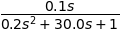

In [13]:
import sympy
from sympy import *
sympy.init_printing()
s = Symbol('s')
t = Symbol('t', positive=True)

C = 100.0e-3
L = 2
R = 300.0

F1 = (s*C)/((L*C*s**2)+(R*C*s)+1)
F1.expand()

In [14]:
from scipy import signal

Num = [C, 0]
Den = [L*C, R*C, 1]

sysF1 = signal.lti(Num, Den)
w, H = signal.freqresp(sysF1)
print(sysF1.zeros, sysF1.poles)

[0.] [-1.49966659e+02 -3.33407440e-02]


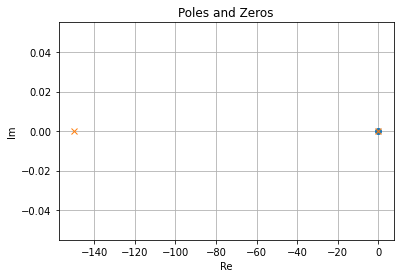

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(sysF1.zeros.real, sysF1.zeros.imag, 'o')
plt.plot(sysF1.poles.real, sysF1.poles.imag, 'x')

plt.rcParams['figure.figsize'] = [23/2.54, 15/2.54]

plt.title('Poles and Zeros')
plt.xlabel('Re')
plt.ylabel('Im')
#plt.xlim(-3, 3) # According to the position of the poles!!!
#plt.ylim(-3, 3)
plt.grid()
plt.show()

We calculate the response in time for a constant input of 10 Vdc

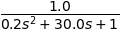

In [16]:
F2 = F1*(10/s)
F2.expand()

In [17]:
xt = inverse_laplace_transform(F2,s,t).evalf().simplify()

In [18]:
xt

We will now plot the transient response of this current when a source of 10 Vdc voltage is connected at $t = 0$.

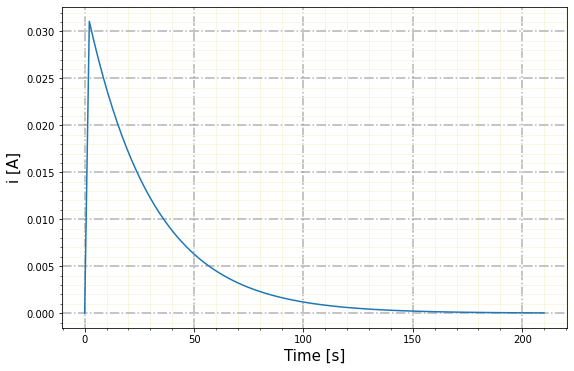

In [19]:
t, y = signal.step2(sysF1) # Single step response
plt.rcParams['figure.figsize'] = [23/2.54, 15/2.54] # Size adjustment, 23 cm x 15 cm
plt.plot(t, 10 * y) # Equivalent to an input height of 10 V

plt.xlabel('Time [s]', fontsize=15)
plt.ylabel('i [A]', fontsize=15)
plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dashdot', lw=1.5) # Mayor grid lines
plt.grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=1) # Minor grid lines
plt.minorticks_on()

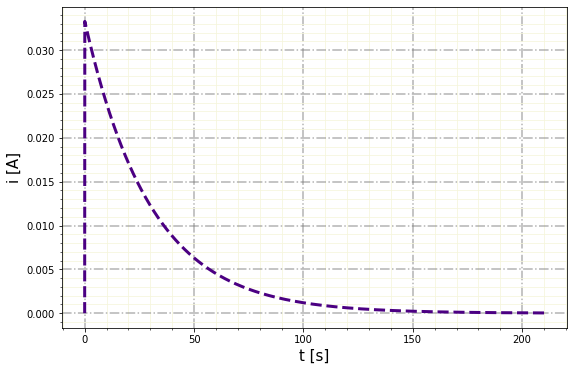

In [22]:
import numpy as np
import math # Python number method exp(x) returns returns exponential of x: e^x.
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [23/2.54, 15/2.54] # Size adjustment, 23 cm x 15 cm

t = np.linspace(0, 210, num=10000)
y = (-0.033348)*(2.71828182846)**(-150*t)+(0.033348)*(2.71828182846)**(-0.0333*t)

plt.plot(t, y, color='Indigo', linestyle='--', linewidth=3) # Custom line
plt.xlabel('t [s]', fontsize=15)
plt.ylabel('i [A]', fontsize=15)
plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dashdot', lw=1.5) # Mayor grid lines
plt.grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=1) # Minor grid lines
plt.minorticks_on()
plt.show()

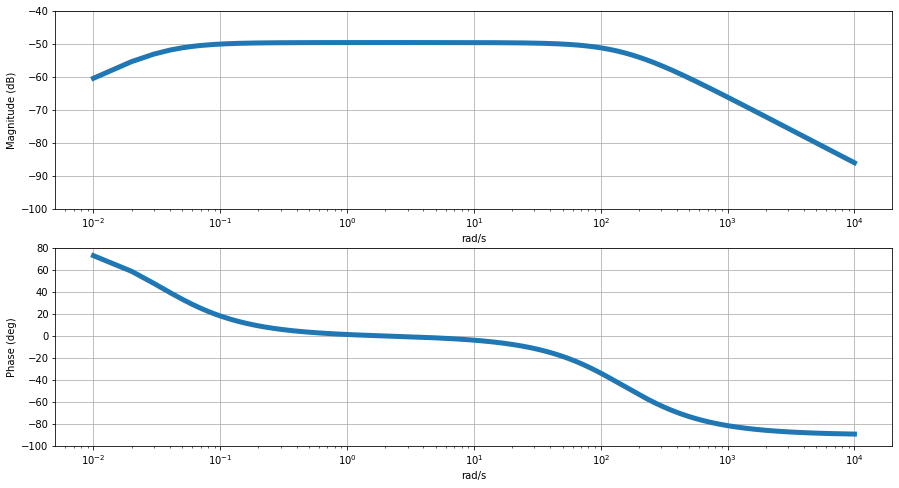

In [23]:
w, mag, phase = signal.bode(sysF1, np.arange(0.01, 10000.0, 0.01).tolist())

plt.figure(figsize=(15,8))
plt.subplot(2,1,1)
plt.semilogx(w, mag, lw=5)    # Bode magnitude plot

plt.ylim([-100, -40]) # Limites grafica magnitud eje y
plt.xlabel('rad/s')
plt.ylabel('Magnitude (dB)')
plt.grid(True)

plt.subplot(2,1,2)
plt.semilogx(w, phase, lw=5, label="real bode plot")  # Bode phase plot

plt.xlabel('rad/s')
plt.ylim([-100, 80]) # Limites grafica fase eje y
plt.ylabel('Phase (deg)')
plt.grid(True)
plt.show()

## **Example**: Mechanical system without friction

Find the differential equation that describes the following system:

In [24]:
SVG(valid_path + 'model_fig11.svg')

**Solution**:

$$\sum F=0$$

In [ ]:
SVG(valid_path + 'model_fig12.svg')

$$K\int_{0}^{t}v\left(t\right)\,dt+f_{K}\left(0\right)$$

$$f\left(t\right)=M\frac{dv\left(t\right)}{dt}+K\int_{0}^{t}v\left(t\right)\,dt+f_{K}\left(0\right)+\beta\,v\left(t\right)$$

Applying Laplace to find the transfer function:

$$F\left(s\right)=MsV\left(s\right)-Mv\left(0\right)+K\frac{1}{s}V\left(s\right)+\frac{f_{K}\left(0\right)}{s}+\beta V\left(s\right)$$

$$MsV\left(s\right)+\frac{K}{s}V\left(s\right)+\beta V\left(s\right)=Mv\left(0\right)-\frac{f_{K}\left(0\right)}{s}+F\left(s\right)$$

if $v\left(0\right)=f_{K}\left(0\right)=0$:

$$V\left(s\right)\left[Ms+\frac{K}{s}+\beta\right]=F\left(s\right)$$

$$V\left(s\right)\left[\frac{Ms^{2}+K+\beta s}{s}\right]=F\left(s\right)$$

$$\frac{V\left(s\right)}{F\left(s\right)}=\left[\frac{s}{Ms^{2}+\beta s+K}\right]$$

In [25]:
import sympy
from sympy import *
sympy.init_printing()
s = Symbol('s')
t = Symbol('t', positive=True)

M = 0.8
K = 100.0
B = 1.0

F1 = (s)/((M*s**2)+(B*s)+K)
F1.expand()

In [26]:
from scipy import signal

Num = [1, 0]
Den = [M, B, K]

sysF1 = signal.lti(Num, Den)
w, H = signal.freqresp(sysF1)
print(sysF1.zeros, sysF1.poles)

[0.] [-0.625+11.16285694j -0.625-11.16285694j]


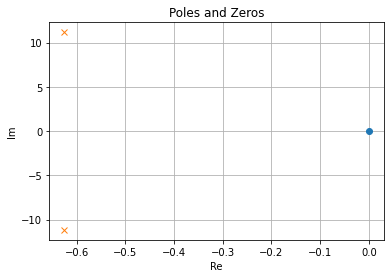

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(sysF1.zeros.real, sysF1.zeros.imag, 'o')
plt.plot(sysF1.poles.real, sysF1.poles.imag, 'x')

plt.rcParams['figure.figsize'] = [23/2.54, 15/2.54]

plt.title('Poles and Zeros')
plt.xlabel('Re')
plt.ylabel('Im')
#plt.xlim(-3, 3) # According to the position of the poles!!!
#plt.ylim(-3, 3)
plt.grid()
plt.show()

Let's plot the response at a unitary step ($M=$0.8 kg, $K=$ 100 N/m, $\beta$=1 N s/m):

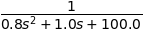

In [28]:
F2 = F1*(1/s)
F2.expand()

In [29]:
xt = inverse_laplace_transform(F2,s,t).evalf().simplify()

In [30]:
xt

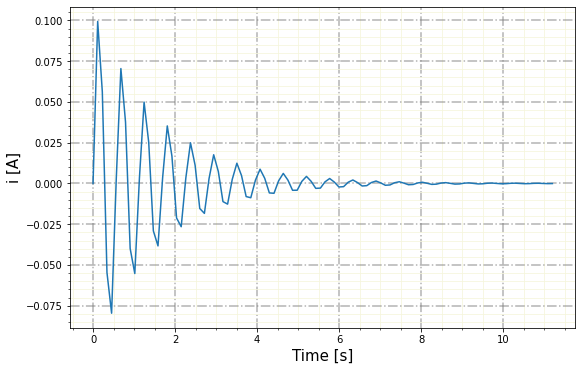

In [31]:
t, y = signal.step2(sysF1) # Single step response
plt.rcParams['figure.figsize'] = [23/2.54, 15/2.54] # Size adjustment, 23 cm x 15 cm
plt.plot(t, 1 * y) # Equivalent to an input height of 1 N

plt.xlabel('Time [s]', fontsize=15)
plt.ylabel('i [A]', fontsize=15)
plt.grid(b=True, which='major', color='gray', alpha=0.6, linestyle='dashdot', lw=1.5) # Mayor grid lines
plt.grid(b=True, which='minor', color='beige', alpha=0.8, ls='-', lw=1) # Minor grid lines
plt.minorticks_on()

## **Example**: Coupled mechanical system

Find the differential equation that describes the following system:

In [32]:
SVG(valid_path + 'model_fig13.svg')

**Solution**:

$$\sum F=0$$

In [33]:
SVG(valid_path + 'model_fig14.svg')

$$\begin{array}{c}
f\left(t\right)=M_{1}\frac{dv_{1}\left(t\right)}{dt}+\beta\left(v_{1}\left(t\right)-v_{2}\left(t\right)\right)+K\int_{0}^{t}\left(v_{1}\left(t\right)-v_{2}\left(t\right)\right)dt+f_{K}\left(0\right)\\
M_{2}\frac{dv_{2}\left(t\right)}{dt}=\beta\left(v_{1}\left(t\right)-v_{2}\left(t\right)\right)+K\int_{0}^{t}\left(v_{1}\left(t\right)-v_{2}\left(t\right)\right)dt+f_{K}\left(0\right)
\end{array}$$

## **Example**: Rotational mechanical system

Find the differential equation that describes the following system:

In [34]:
SVG(valid_path + 'model_fig15.svg')

**Solution**:

$$\sum T=0$$

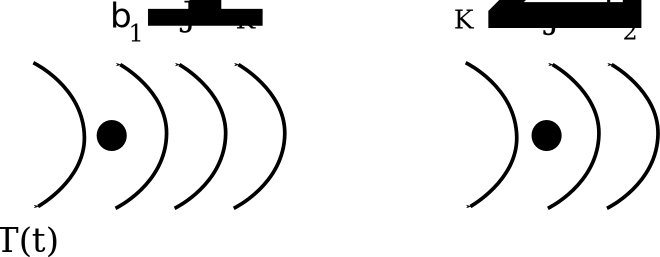

In [35]:
SVG(valid_path + 'model_fig16.svg')

$$\begin{array}{c}
T\left(t\right)=\beta_{1}\omega_{1}\left(t\right)+J_{1}\frac{d\omega_{1}\left(t\right)}{dt}+K\int_{0}^{t}\left(\omega_{1}\left(t\right)-\omega_{2}\left(t\right)\right)dt+T_{K}\left(0\right)\\
K\int_{0}^{t}\left(\omega_{1}\left(t\right)-\omega_{2}\left(t\right)\right)dt+T_{K}\left(0\right)=J_{2}\frac{d\omega_{2}\left(t\right)}{dt}+\beta_{2}\omega_{2}\left(t\right)
\end{array}$$

## **Example**: Vertical mechanical system

Find the differential equation that describes the following system:

In [36]:
SVG(valid_path + 'model_fig17.svg')

**Solution**:

$$\sum F=0$$

In [37]:
SVG(valid_path + 'model_fig18.svg')

$$\begin{array}{c}
f\left(t\right)=M_{1}\frac{d^{2}y_{1}\left(t\right)}{dt^{2}}+K_{1}\left(y_{1}\left(t\right)-y_{2}\left(t\right)\right)\\
K_{1}\left(y_{1}\left(t\right)-y_{2}\left(t\right)\right)=M_{2}\frac{d^{2}y_{2}\left(t\right)}{dt^{2}}+K_{2}y_{2}\left(t\right)+\frac{\beta}{2}\frac{dy_{2}\left(t\right)}{dt}+\frac{\beta}{2}\frac{dy_{2}\left(t\right)}{dt}
\end{array}$$

## **Example**: Mechanical system with spring deformation

Find the differential equation that describes the following system:

In [38]:
SVG(valid_path + 'model_fig19.svg')

**Solution**:

$$\sum F=0$$

In [ ]:
SVG(valid_path + 'model_fig20.svg')

$$\begin{array}{c}
f\left(t\right)=K\left(y_{1}\left(t\right)-y_{2}\left(t\right)\right)\\
K\left(y_{1}\left(t\right)-y_{2}\left(t\right)\right)=M\frac{d^{2}y_{2}\left(t\right)}{dt^{2}}+\beta\frac{dy_{2}\left(t\right)}{dt}
\end{array}$$

## **Example**: Vertical mechanical system

Find the differential equation that describes the following system:

In [ ]:
SVG(valid_path + 'model_fig21.svg')

**Solution**:

$$\sum F=0$$

In [ ]:
SVG(valid_path + 'model_fig22.svg')

$$\begin{array}{c}
f\left(t\right)=M_{1}\frac{d^{2}y_{1}\left(t\right)}{dt^{2}}+K_{1}\left(y_{1}\left(t\right)-y_{2}\left(t\right)\right)+\beta_{1}\frac{d\left(y_{1}\left(t\right)-y_{2}\left(t\right)\right)}{dt}\\
K_{1}\left(y_{1}\left(t\right)-y_{2}\left(t\right)\right)+\beta_{1}\frac{d\left(y_{1}\left(t\right)-y_{2}\left(t\right)\right)}{dt}=M_{2}\frac{d^{2}y_{2}\left(t\right)}{dt^{2}}+K_{2}y_{2}\left(t\right)+\beta_{2}\frac{dy_{2}\left(t\right)}{dt}
\end{array}$$

## Workshop

For the mechanical system of the figure.

In [39]:
SVG(valid_path + 'model_fig23.svg')

- Find the transfer function.
- Find $y(t)$ if $f\left(t\right)=e^{\left(-t\right)}\mu\left(t\right)$.
- Determine $f(t)$ if $y\left(t\right)=sin\left(t\right)\mu\left(t\right)$.
- Calculate the $K$ value that makes $y\left(\infty\right)=$ 0.5 if $f\left(t\right)=\mu\left(t\right)$.

**Solution**:

$$\sum F=0$$

In [40]:
SVG(valid_path + 'model_fig24.svg')

$$f\left(t\right)=M\frac{d^{2}y\left(t\right)}{dt^{2}}+K\,y\left(t\right)+\beta_{1}\frac{dy\left(t\right)}{dt}+\beta_{2}\frac{dy\left(t\right)}{dt}$$